<a href="https://colab.research.google.com/github/mbumba1/Data-Science-For-Beginners/blob/main/day1_pandas_mpl_student_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Start with importing packages that we need
import numpy as np
import pandas as pd

# As a reminder, to run a cell with a code snippet, click on the cell and press shift + enter.

Many modeling frameworks like scikit learn or pytorch etc. allow direct loading of toy datasets that you can use to quickly try out new models.

Here, we will specifically look at the 'iris dataset' provided by scikit learn.

In [ ]:
from sklearn.datasets import load_iris

# Loading the dataset as PANDAS DATAFRAMES to explore
iris_features, iris_type = load_iris(return_X_y=True, as_frame=True)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

Let's take a couple minutes to take a look at the API (application programming interface) reference provided by scikit learn.

It will give a sense of not only what a reference page looks like, but it will help us understand what this function does and be a practice of finding information of interest.

## Basic exploratory analysis of tabular data with pandas

### Introduction

What is tabular data?

It is literally data that can be expressed as a table.

For example, data of the participants of this week of summer school can be organized into a table as following.

| Name | Role | Department | Level |
|------|------|------------|-------|
| Elle |Lead instructor|SI| Lecturer|
|Eunjae|Instructor|MIDAS|Postdoc|
|John | Participant |Engineering|Grad student|

In tabular data, each row corresponds to an 'instance', 'datapoint', 'observation', 'sample'.

Each column, on the other hand, correspond to 'features', 'covariates', 'descriptors' that describe each row.

In this section, we will explore how we can inspect such a dataset with a library called pandas, which we imported as pd above.

In [ ]:
# You need to know what type of object the dataset is, to know how to handle it.
type(iris_features)

In [ ]:
# The first thing you need to do when you get your hands on a new dataset is to know its size.
# How many datapoints and features are represented in the dataset?
iris_features.shape

In [ ]:
# Now let's look at the type of the data each column in the dataframe.
iris_features.dtypes

We have four features – the widths and lengths of both sepal and petal. For your reference, here is a nice figure that shows what they refer to!

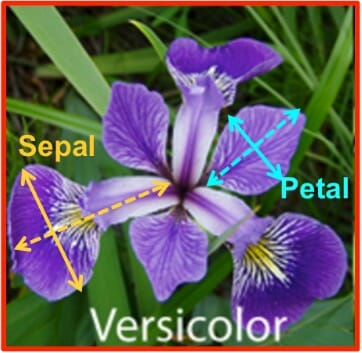

Wait, but such data can be messy (missing values, type of values not consistent across a column) or tidy (no such compromises).
Let's check what this dataset looks like, first checking the number of missing values.

In [ ]:
iris_features.isnull().sum() # isnull applies a filter to identify missing values. sum adds the number of their occurrences.

In [ ]:
# Or combined,
iris_features.info()

We see that all columns are consistently made of floats. Combined with the fact that there's no missing value, this dataset is tidy!

While we will learn to deal with messy datasets later this week, let's just use an example to see what a messy dataframe looks like.

In [ ]:
messy_df = pd.DataFrame(
    {
        "Column1":["Hello, world!", 3, 9.5],
        "Column2":[np.nan, 5, 6] # NaN denotes missing data - np.nan is such a term in numpy.
    }
)
print("Number of missing features")
print(messy_df.isnull().sum())
print()
print("Data type of each column")
print(messy_df.dtypes)

In [ ]:
# Looking at the first five rows of the data
iris_features.head()

### Exercise 1

For any exercise, replace the \<YOUR OWN CODE\> into your own code.

In [ ]:
# Q) What type of object is iris_type?
<YOUR OWN CODE>

In [ ]:
# Q) What is the shape of iris_type?
<YOUR OWN CODE>

In [ ]:
# Q) What type of object is an individual entry of iris_type?
<YOUR OWN CODE>

In [ ]:
# Q) How do we look at the iris type of the first five rows?
<YOUR OWN CODE>

In [ ]:
# Q) How do we look at the first TEN rows of iris_features?
<YOUR OWN CODE>

In [ ]:
# Q) How do we look at the last five rows of iris_type?
<YOUR OWN CODE>

### Deeper inspection

Having the type of flowers as numbers isn't so intuitive.

While it might be okay with three types in total, we might want to see their actual names as we analyze.

According to the website that we fetched the dataset, 0 : setosa / 1 : versicolor / 2 : virginica.

Let's transform the numerical values into their names for our reference.

In [ ]:
mapping = {
    0 : "setosa",
    1 : "versicolor",
    2 : "virginica"
}
iris_names = iris_type.map(mapping)
iris_names.head()

Now that we can easily know what type of flower each row corresponds to, let's go back to inspecting the feature dataframe.
One easy way to get started is to look at summary statistics, like mean and standard deviation.

In [ ]:
iris_features.mean()

We looked at the dataset as a whole.

What if we want to look at specific parts of the dataframe?

In [ ]:
# Let's assume that we want to look at a specific column - say sepal length.
iris_features["sepal length (cm)"]

In [ ]:
# Now we can get the average of only sepal length.
iris_features["sepal length (cm)"].mean()

In [ ]:
# Nice, let's access the row with index 5 in the same way!
iris_features[5]

While we briefly went through what to mostly look for in an error message, please take a look at the link below for further information.

https://docs.python.org/3/tutorial/errors.html#

In [ ]:
# But you can get SLICES of rows. For example, if you want to see rows 5–9:
iris_features[5:10]

In [ ]:
# .loc, which corresponds to label-based indexing, you can also specify discrete rows that you are interested in by putting their indices within a list.
# For example, you can look at rows 5, 7, 9 by the following:
iris_features.loc[[5, 7, 9], ["sepal length (cm)", "petal length (cm)"]]

In [ ]:
# The other method is "iloc", which corresponds to integer-location based indexing, selects by "position".
# For both the rows and columns, 0 would correspond to the first row and so on. In other words, they are 0-indexed.

iris_features.iloc[[5, 7, 9], [0, 2]]

In [ ]:
# Another useful feature for analyzing data is to filter the data using boolean logic, by evaluating some condition.
# If we assume that we are interested in flowers with sepal lengths greater than 6.6 cm
# we can look at those datapoints by running the following:
iris_features[iris_features["sepal length (cm)"] > 6.6]

In [ ]:
# It is also common that one would want to apply multiple conditions.
# You can do so by putting each condition within a () and
# using & to specify you want those conditions to be satisfied simultaneously.

# For example, you can look at the feature table for those where sepal length is greater than 6.6 cm and petal length greater than 5.5 cm with the code below.
iris_features[(iris_features["sepal length (cm)"]>6.6) & (iris_features["petal length (cm)"]>5.5)]

### Exercise 2

In [ ]:
# Q) Can you guess the code to look at the standard deviation of each column?
<YOUR OWN CODE>

In [ ]:
# Q) Can you use '.loc' to see rows 5–10 but only their sepal length and petal lengths?
<YOUR OWN CODE>

In [ ]:
# Q) How do you get the feature table for those with sepal widths below 2.8 cm OR petal widths below 0.4 cm?
# HINT: the logical operator for OR is |
<YOUR OWN CODE>

In [ ]:
# Q) How do you get the number of instances with sepal lengths greater than 6.6 AND petal lengths greater than 5.5 cm?
# HINT: what would be an intuitive logical operator for AND?
<YOUR OWN CODE>

In [ ]:
# Given that
# 1) the conditions within [] specify the rows to look at and
# 2) iris_names has the type of iris corresponding to each row
# you can directly look at the name of iris type that satisfy the conditions that we put in.

# Q) What is the code to look at the names of the iris types that have sepal lengths greater than 6.6 cm AND petal lengths greater than 5.5 cm?
<YOUR OWN CODE>

If the purpose of this dataset is to be able to predict the type of iris based on the four features, you can see such exploratory analysis already gives you some sense of how you can achieve that goal, at least for virginica.

Data analysis should ALWAYS come first before applying machine learning etc.

It lets you understand the dataset that you are working with and might inform you how you should proceed about working with it.

In [ ]:
# Q) How do we get the average values of features for "virginica"?
<YOUR OWN CODE>

In [ ]:
# Challenge Q) How many setosa flowers have sepal width that are greater than the mean of that of virginica?
avg_sepal_width_virginica = <YOUR OWN CODE>
<YOUR OWN CODE>

# Data visualization with matplotlib

### Introduction to matplotlib

We've seen how the values of features can help separate the types of iris.

Rather than manually entering different values and comparing them, it would be much easier to look at them altogether.

Histograms are a great way to get a sense of how data is distributed.

As such, we'll first draw a histogram of how the petal lengths are distributed for different types.

We will use Matplotlib, the representative visualization package.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(iris_features["petal length (cm)"])

Simply calling plt.hist() and using values that we are interested in as the argument already gives us something useful.

But you see that the width of the ticks on the x-axis are not aligned well with whole numbers, which would be easier for us to grasp.

It would also be more informative if we could look at the distribution of the values by the iris types.

Having labels on both axes would also be more informative.

Let's look at specifying these.

Please refer to the link below for more information on matplotlib's histogram.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
plt.hist(
    iris_features["petal length (cm)"],
    bins = np.arange(0, int(iris_features["petal length (cm)"].max())+1, 0.5), # So that we align the bars to be between integers
)
plt.xlabel("Petal length (cm)") # Adding the x axis label
plt.ylabel("Count") # Adding the y axis label

While this looks better than the previous versions, the bars are still difficult to distinguish between the bins. We can specify the 'rwidth' parameter as the ratio of the bar's width to the bins' width.

In [ ]:
plt.hist(
    iris_features["petal length (cm)"],
    bins = np.arange(0, int(iris_features["petal length (cm)"].max())+1, 0.5),
    rwidth = 0.95 # width of the bars
)
plt.xlabel("Petal length (cm)")
plt.ylabel("Count")

This looks better than the previous, but we still haven't separated the bars by the iris types.
To do this, we have to plot the histogram for each type of flower iteratively.
Another important aspect of this exercise is coloring the bars according to the type of flower, so we can distinguish them.

In [ ]:
import matplotlib
from matplotlib import colormaps

cmap = matplotlib.colormaps["viridis"] # You can choose a colormap that you like -  see the link on the right for other colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
for a, iris_name in enumerate(iris_names.unique()) : # Repeat plotting for each type of iris.
    plt.hist(
        iris_features[iris_names == iris_name]["petal length (cm)"],
        bins = np.arange(0, int(iris_features["petal length (cm)"].max())+1, 0.5),
        rwidth = 0.95,
        color = cmap(a/len(iris_names.unique())), # determining a color from the viridis colormap defined above
        alpha = 0.5 # Adjusts the opaqueness to be able to see overlapped bars
    )
plt.xlim(0, 7) # Setting the range of x axis values for aesthetics
plt.xlabel("Petal length (cm)")
plt.ylabel("Count")

Another example with further aesthetics refinement such as plot box thickness, fonts.

Having a legend would also improve the readability of the plot.

As academics, we also want to be able to save it for use in publication with a specific figure size.

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3)) # First establishing a frame to draw the plots in, along with the size we want the figure to be.
for a, iris_name in enumerate(iris_names.unique()) :
    ax.hist( # After declaring 'subplots', we use 'ax' instead of 'plt' to show that we want to draw the plot in that frame.
        iris_features[iris_names == iris_name]["petal length (cm)"],
        bins = np.arange(0, int(iris_features["petal length (cm)"].max())+1, 0.5),
        rwidth = 0.95,
        color = cmap(a/len(iris_names.unique())),
        alpha = 0.5,
        label=iris_name # To use for the legend
    )
ax.set_xlim(0, 7) # See how the xlim changes to set_xlim when ax is used instead of plt
ax.set_xlabel("Petal length (cm)", fontdict={'family':'sans-serif', 'size':8, 'weight':'bold'})
ax.set_ylabel("Count", fontdict={'family':'sans-serif', 'size':8, 'weight':'bold'})
ax.set_title("Petal length distribution by iris type", fontdict={'family':'sans-serif', 'size':10, 'weight':'bold'})
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels([round(x) for x in ax.get_xticks()], fontdict={'family':'sans-serif', 'size':6})
ax.set_yticklabels([round(y) for y in ax.get_yticks()], fontdict={'family':'sans-serif', 'size':6})
ax.legend(prop={"family":"sans-serif", "size":8}) # To have the legend appear and specifying the fonts. Also note how we define fonts through 'prop' and not 'fontdict'

for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(1.5) # adjusting the width of line of every side of the box.

plt.savefig("petal_length_distribution.svg", format="svg", dpi=300)

### Plotting exercise

Lastly, let's look at making another important type of plot – the scatter plot!

In the exploratory data analysis, we found how petal and sepal lengths, combined, could help distinguish between the iris types.

Let's draw a scatter plot which has the petal length as the x-axis and sepal length as the y-axis.

The color of each scatter point should correspond to the iris type as used in the plot above.

In [ ]:
# Q) Draw the scatter plot described above.
# Please feel free to look at the reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# Also try to achieve the aesthetics that satisfy your style!

<YOUR OWN CODE>